In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

pd.set_option('display.max_columns', None)
import datetime, warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
df = pd.read_csv(r'D:\git_project\Flight-Delay-Prediction\Data\Flight\flight_df1.csv', index_col = 0)

In [3]:
#data overview
df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2016-01-01,Delta Airlines,Detroit,Los Angeles,20,0.0,23.0,4,4,13.0,22,-24.0,0.0,0.0,309.0,285.0,249.0,1979.0,1,1,Jan,0
1,2016-01-01,Delta Airlines,Atlanta,Grand Rapids,22,5.0,13.0,4,4,4.0,24,-2.0,0.0,0.0,116.0,109.0,92.0,640.0,1,1,Jan,0
2,2016-01-01,Delta Airlines,Los Angeles,Atlanta,23,1.0,19.0,4,1,5.0,6,-13.0,0.0,0.0,245.0,231.0,207.0,1947.0,1,1,Jan,0
3,2016-01-01,Delta Airlines,Salt Lake City,Atlanta,17,4.0,12.0,3,4,8.0,23,-16.0,0.0,0.0,213.0,193.0,173.0,1590.0,1,1,Jan,0
4,2016-01-01,Delta Airlines,Bozeman,Minneapolis,9,72.0,63.0,2,3,4.0,13,124.0,0.0,0.0,136.0,188.0,121.0,874.0,1,1,Jan,1


In [4]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5537988 entries, 0 to 5537987
Data columns (total 22 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   ORIGIN               object 
 3   DEST                 object 
 4   CRS_DEP_TIME         int64  
 5   DEP_DELAY            float64
 6   TAXI_OUT             float64
 7   WHEELS_OFF           int64  
 8   WHEELS_ON            int64  
 9   TAXI_IN              float64
 10  CRS_ARR_TIME         int64  
 11  ARR_DELAY            float64
 12  CANCELLED            float64
 13  DIVERTED             float64
 14  CRS_ELAPSED_TIME     float64
 15  ACTUAL_ELAPSED_TIME  float64
 16  AIR_TIME             float64
 17  DISTANCE             float64
 18  DAY                  int64  
 19  MONTH                int64  
 20  MONTH_AB             object 
 21  FLIGHT_STATUS        int64  
dtypes: float64(10), int64(7), object(5)
memory usage: 971.8+ MB


In [5]:
# Convert 'Dt_Customer' column to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], format='%Y-%m-%d')

In [6]:
#Changing the data type of the columns
df['DEP_DELAY'] =  df['DEP_DELAY'].astype(int)
df['TAXI_OUT'] =  df['TAXI_OUT'].astype(int)
df['TAXI_IN'] = df['TAXI_IN'].astype(int)
df['ARR_DELAY'] = df['ARR_DELAY'].astype(int)
df['CANCELLED'] = df['CANCELLED'].astype(int)
df['DIVERTED'] = df['DIVERTED'].astype(int)
df['CRS_ELAPSED_TIME'] = df['CRS_ELAPSED_TIME'].astype(int)
df['ACTUAL_ELAPSED_TIME'] = df['ACTUAL_ELAPSED_TIME'].astype(int)
df['AIR_TIME'] = df['AIR_TIME'].astype(int)
df['DISTANCE'] = df['DISTANCE'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5537988 entries, 0 to 5537987
Data columns (total 22 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   ORIGIN               object        
 3   DEST                 object        
 4   CRS_DEP_TIME         int64         
 5   DEP_DELAY            int32         
 6   TAXI_OUT             int32         
 7   WHEELS_OFF           int64         
 8   WHEELS_ON            int64         
 9   TAXI_IN              int32         
 10  CRS_ARR_TIME         int64         
 11  ARR_DELAY            int32         
 12  CANCELLED            int32         
 13  DIVERTED             int32         
 14  CRS_ELAPSED_TIME     int32         
 15  ACTUAL_ELAPSED_TIME  int32         
 16  AIR_TIME             int32         
 17  DISTANCE             int32         
 18  DAY                  int64         
 19  MONTH                

In [8]:
df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2016-01-01,Delta Airlines,Detroit,Los Angeles,20,0,23,4,4,13,22,-24,0,0,309,285,249,1979,1,1,Jan,0
1,2016-01-01,Delta Airlines,Atlanta,Grand Rapids,22,5,13,4,4,4,24,-2,0,0,116,109,92,640,1,1,Jan,0
2,2016-01-01,Delta Airlines,Los Angeles,Atlanta,23,1,19,4,1,5,6,-13,0,0,245,231,207,1947,1,1,Jan,0
3,2016-01-01,Delta Airlines,Salt Lake City,Atlanta,17,4,12,3,4,8,23,-16,0,0,213,193,173,1590,1,1,Jan,0
4,2016-01-01,Delta Airlines,Bozeman,Minneapolis,9,72,63,2,3,4,13,124,0,0,136,188,121,874,1,1,Jan,1


In [9]:
#adding the column of weekday
df['WEEKDAY'] = df['FL_DATE'].dt.dayofweek

In [10]:
df['IS_WEEKEND'] =df['WEEKDAY'].apply(lambda x : 1 if x >= 5 else 0 )

In [11]:
df.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DAY,MONTH,MONTH_AB,FLIGHT_STATUS,WEEKDAY,IS_WEEKEND
0,2016-01-01,Delta Airlines,Detroit,Los Angeles,20,0,23,4,4,13,22,-24,0,0,309,285,249,1979,1,1,Jan,0,4,0
1,2016-01-01,Delta Airlines,Atlanta,Grand Rapids,22,5,13,4,4,4,24,-2,0,0,116,109,92,640,1,1,Jan,0,4,0
2,2016-01-01,Delta Airlines,Los Angeles,Atlanta,23,1,19,4,1,5,6,-13,0,0,245,231,207,1947,1,1,Jan,0,4,0
3,2016-01-01,Delta Airlines,Salt Lake City,Atlanta,17,4,12,3,4,8,23,-16,0,0,213,193,173,1590,1,1,Jan,0,4,0
4,2016-01-01,Delta Airlines,Bozeman,Minneapolis,9,72,63,2,3,4,13,124,0,0,136,188,121,874,1,1,Jan,1,4,0


In [12]:
# Rename the columns to proper case
df.columns = df.columns.str.title()

In [13]:
df.head()

,Fl_Date,Op_Carrier,Origin,Dest,Crs_Dep_Time,Dep_Delay,Taxi_Out,Wheels_Off,Wheels_On,Taxi_In,Crs_Arr_Time,Arr_Delay,Cancelled,Diverted,Crs_Elapsed_Time,Actual_Elapsed_Time,Air_Time,Distance,Day,Month,Month_Ab,Flight_Status,Weekday,Is_Weekend
0,2016-01-01,Delta Airlines,Detroit,Los Angeles,20,0,23,4,4,13,22,-24,0,0,309,285,249,1979,1,1,Jan,0,4,0
1,2016-01-01,Delta Airlines,Atlanta,Grand Rapids,22,5,13,4,4,4,24,-2,0,0,116,109,92,640,1,1,Jan,0,4,0
2,2016-01-01,Delta Airlines,Los Angeles,Atlanta,23,1,19,4,1,5,6,-13,0,0,245,231,207,1947,1,1,Jan,0,4,0
3,2016-01-01,Delta Airlines,Salt Lake City,Atlanta,17,4,12,3,4,8,23,-16,0,0,213,193,173,1590,1,1,Jan,0,4,0
4,2016-01-01,Delta Airlines,Bozeman,Minneapolis,9,72,63,2,3,4,13,124,0,0,136,188,121,874,1,1,Jan,1,4,0


In [14]:
#Creating a binary variable to delayed filghts
df['Delayed'] = df['Arr_Delay'].apply(lambda x : 1 if x > 0 else 0 )

In [15]:
#Checking missing values
df.isnull().sum()

Fl_Date                0
Op_Carrier             0
Origin                 0
Dest                   0
Crs_Dep_Time           0
Dep_Delay              0
Taxi_Out               0
Wheels_Off             0
Wheels_On              0
Taxi_In                0
Crs_Arr_Time           0
Arr_Delay              0
Cancelled              0
Diverted               0
Crs_Elapsed_Time       0
Actual_Elapsed_Time    0
Air_Time               0
Distance               0
Day                    0
Month                  0
Month_Ab               0
Flight_Status          0
Weekday                0
Is_Weekend             0
Delayed                0
dtype: int64

In [16]:
#to see all the rows
pd.set_option('display.max_info_rows',1000)

In [17]:
df.head()

,Fl_Date,Op_Carrier,Origin,Dest,Crs_Dep_Time,Dep_Delay,Taxi_Out,Wheels_Off,Wheels_On,Taxi_In,Crs_Arr_Time,Arr_Delay,Cancelled,Diverted,Crs_Elapsed_Time,Actual_Elapsed_Time,Air_Time,Distance,Day,Month,Month_Ab,Flight_Status,Weekday,Is_Weekend,Delayed
0,2016-01-01,Delta Airlines,Detroit,Los Angeles,20,0,23,4,4,13,22,-24,0,0,309,285,249,1979,1,1,Jan,0,4,0,0
1,2016-01-01,Delta Airlines,Atlanta,Grand Rapids,22,5,13,4,4,4,24,-2,0,0,116,109,92,640,1,1,Jan,0,4,0,0
2,2016-01-01,Delta Airlines,Los Angeles,Atlanta,23,1,19,4,1,5,6,-13,0,0,245,231,207,1947,1,1,Jan,0,4,0,0
3,2016-01-01,Delta Airlines,Salt Lake City,Atlanta,17,4,12,3,4,8,23,-16,0,0,213,193,173,1590,1,1,Jan,0,4,0,0
4,2016-01-01,Delta Airlines,Bozeman,Minneapolis,9,72,63,2,3,4,13,124,0,0,136,188,121,874,1,1,Jan,1,4,0,1


In [18]:
#Changing the column names for clarity
df.rename(columns= {'Crs_Dep_Time' : 'Crs_Dep_Time(h)'}, inplace= True)
df.rename(columns= {'Crs_Arr_Time' : 'Crs_Arr_Time(h)'}, inplace= True)

In [19]:
df.head()

,Fl_Date,Op_Carrier,Origin,Dest,Crs_Dep_Time(h),Dep_Delay,Taxi_Out,Wheels_Off,Wheels_On,Taxi_In,Crs_Arr_Time(h),Arr_Delay,Cancelled,Diverted,Crs_Elapsed_Time,Actual_Elapsed_Time,Air_Time,Distance,Day,Month,Month_Ab,Flight_Status,Weekday,Is_Weekend,Delayed
0,2016-01-01,Delta Airlines,Detroit,Los Angeles,20,0,23,4,4,13,22,-24,0,0,309,285,249,1979,1,1,Jan,0,4,0,0
1,2016-01-01,Delta Airlines,Atlanta,Grand Rapids,22,5,13,4,4,4,24,-2,0,0,116,109,92,640,1,1,Jan,0,4,0,0
2,2016-01-01,Delta Airlines,Los Angeles,Atlanta,23,1,19,4,1,5,6,-13,0,0,245,231,207,1947,1,1,Jan,0,4,0,0
3,2016-01-01,Delta Airlines,Salt Lake City,Atlanta,17,4,12,3,4,8,23,-16,0,0,213,193,173,1590,1,1,Jan,0,4,0,0
4,2016-01-01,Delta Airlines,Bozeman,Minneapolis,9,72,63,2,3,4,13,124,0,0,136,188,121,874,1,1,Jan,1,4,0,1


In [20]:
#We can drop the Month_Ab column
df.drop(columns = ['Month_Ab'], inplace=True)

In [21]:
#changing the data type of the columns
df['Crs_Dep_Time(h)'] = df['Crs_Dep_Time(h)'].astype(object)
df['Crs_Arr_Time(h)'] = df['Crs_Arr_Time(h)'].astype(object)
df['Cancelled'] = df['Cancelled'].astype(object)
df['Diverted'] = df['Diverted'].astype(object)
df['Day'] = df['Day'].astype(object)
df['Month'] = df['Month'].astype(object)
df['Flight_Status'] = df['Flight_Status'].astype(object)
df['Weekday'] = df['Weekday'].astype(object)
df['Is_Weekend'] = df['Is_Weekend'].astype(object)
df['Delayed'] = df['Delayed'].astype(object)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5537988 entries, 0 to 5537987
Data columns (total 24 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Fl_Date              datetime64[ns]
 1   Op_Carrier           object        
 2   Origin               object        
 3   Dest                 object        
 4   Crs_Dep_Time(h)      object        
 5   Dep_Delay            int32         
 6   Taxi_Out             int32         
 7   Wheels_Off           int64         
 8   Wheels_On            int64         
 9   Taxi_In              int32         
 10  Crs_Arr_Time(h)      object        
 11  Arr_Delay            int32         
 12  Cancelled            object        
 13  Diverted             object        
 14  Crs_Elapsed_Time     int32         
 15  Actual_Elapsed_Time  int32         
 16  Air_Time             int32         
 17  Distance             int32         
 18  Day                  object        
 19  Month                

In [23]:
#data information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dep_Delay,5537988.0,8.873748,39.598683,-204.0,-5.0,-2.0,6.0,2149.0
Taxi_Out,5537988.0,16.185091,8.815590,1.0,11.0,14.0,19.0,186.0
Wheels_Off,5537988.0,2.813912,0.836503,1.0,2.0,3.0,3.0,4.0
Wheels_On,5537988.0,2.969169,0.867920,1.0,2.0,3.0,4.0,4.0
Taxi_In,5537988.0,7.448889,5.681956,1.0,4.0,6.0,9.0,250.0
Arr_Delay,5537988.0,3.519457,41.873358,-152.0,-14.0,-6.0,6.0,2142.0
Crs_Elapsed_Time,5537988.0,145.514441,76.501065,18.0,88.0,126.0,178.0,705.0
Actual_Elapsed_Time,5537988.0,140.160151,75.663719,14.0,84.0,121.0,173.0,778.0
Air_Time,5537988.0,116.526171,73.528620,4.0,62.0,97.0,148.0,723.0
Distance,5537988.0,851.275228,620.096142,28.0,391.0,679.0,1096.0,4983.0


* The mean delay is approx 8 mins. Its values are ranging from -204 to 2149. So there are some outliers present.
* Mean Taxi out time is around 16 mins. Its values ranges from 1 to 186 mins. 
* Mean Taxi In time is around 7 mins. It values ranges from 1 to 250 mins.
* The mean arrival delay is of 3-4 mins. Its values ranges from -152 to 2142, means that there are some outliers present.
* Mean Elapesed time is of 140 mins. It ranges from 14 min to 700 mins.
* Mean Air time is 116 mins.
* Mean distance covered is 851 kms. Ranging from 28 kms to 4983 kms.

In [24]:
df.describe().columns

Index(['Dep_Delay', 'Taxi_Out', 'Wheels_Off', 'Wheels_On', 'Taxi_In',
       'Arr_Delay', 'Crs_Elapsed_Time', 'Actual_Elapsed_Time', 'Air_Time',
       'Distance'],
      dtype='object')

In [25]:
#creating continous and categorical columns 
cont_cols = df.describe().columns
disc_cols = [col for col in df.columns if col not in cont_cols]

In [26]:
#removing the Fl_Date and Delayed columns
disc_cols = disc_cols [1 :-1]

* As we can see most of the columns have the outliers present. 
* So for prediction of the delay in flights, we can have a seperate data for those which got delayed.

In [27]:
df.head()

,Fl_Date,Op_Carrier,Origin,Dest,Crs_Dep_Time(h),Dep_Delay,Taxi_Out,Wheels_Off,Wheels_On,Taxi_In,Crs_Arr_Time(h),Arr_Delay,Cancelled,Diverted,Crs_Elapsed_Time,Actual_Elapsed_Time,Air_Time,Distance,Day,Month,Flight_Status,Weekday,Is_Weekend,Delayed
0,2016-01-01,Delta Airlines,Detroit,Los Angeles,20,0,23,4,4,13,22,-24,0,0,309,285,249,1979,1,1,0,4,0,0
1,2016-01-01,Delta Airlines,Atlanta,Grand Rapids,22,5,13,4,4,4,24,-2,0,0,116,109,92,640,1,1,0,4,0,0
2,2016-01-01,Delta Airlines,Los Angeles,Atlanta,23,1,19,4,1,5,6,-13,0,0,245,231,207,1947,1,1,0,4,0,0
3,2016-01-01,Delta Airlines,Salt Lake City,Atlanta,17,4,12,3,4,8,23,-16,0,0,213,193,173,1590,1,1,0,4,0,0
4,2016-01-01,Delta Airlines,Bozeman,Minneapolis,9,72,63,2,3,4,13,124,0,0,136,188,121,874,1,1,1,4,0,1


In [28]:
delayed_df  = df[df['Delayed'] == 1]

In [29]:
delayed_df.head()

,Fl_Date,Op_Carrier,Origin,Dest,Crs_Dep_Time(h),Dep_Delay,Taxi_Out,Wheels_Off,Wheels_On,Taxi_In,Crs_Arr_Time(h),Arr_Delay,Cancelled,Diverted,Crs_Elapsed_Time,Actual_Elapsed_Time,Air_Time,Distance,Day,Month,Flight_Status,Weekday,Is_Weekend,Delayed
4,2016-01-01,Delta Airlines,Bozeman,Minneapolis,9,72,63,2,3,4,13,124,0,0,136,188,121,874,1,1,1,4,0,1
5,2016-01-01,Delta Airlines,Atlanta,Nashville,13,83,22,3,3,6,13,83,0,0,66,66,38,214,1,1,1,4,0,1
6,2016-01-01,Delta Airlines,Nashville,Atlanta,14,86,15,3,3,6,16,74,0,0,70,58,37,214,1,1,1,4,0,1
7,2016-01-01,Delta Airlines,Atlanta,Jacksonville,10,1,19,2,2,3,11,3,0,0,65,67,45,270,1,1,1,4,0,1
14,2016-01-01,Delta Airlines,Salt Lake City,New York,24,-4,25,1,2,11,7,6,0,0,262,272,236,1990,1,1,1,4,0,1


In [30]:
#removing the delayed column for this delayed df
delayed_df = delayed_df.drop(columns = ['Delayed'])

In [31]:
#delayed_data overview
delayed_df.head()

,Fl_Date,Op_Carrier,Origin,Dest,Crs_Dep_Time(h),Dep_Delay,Taxi_Out,Wheels_Off,Wheels_On,Taxi_In,Crs_Arr_Time(h),Arr_Delay,Cancelled,Diverted,Crs_Elapsed_Time,Actual_Elapsed_Time,Air_Time,Distance,Day,Month,Flight_Status,Weekday,Is_Weekend
4,2016-01-01,Delta Airlines,Bozeman,Minneapolis,9,72,63,2,3,4,13,124,0,0,136,188,121,874,1,1,1,4,0
5,2016-01-01,Delta Airlines,Atlanta,Nashville,13,83,22,3,3,6,13,83,0,0,66,66,38,214,1,1,1,4,0
6,2016-01-01,Delta Airlines,Nashville,Atlanta,14,86,15,3,3,6,16,74,0,0,70,58,37,214,1,1,1,4,0
7,2016-01-01,Delta Airlines,Atlanta,Jacksonville,10,1,19,2,2,3,11,3,0,0,65,67,45,270,1,1,1,4,0
14,2016-01-01,Delta Airlines,Salt Lake City,New York,24,-4,25,1,2,11,7,6,0,0,262,272,236,1990,1,1,1,4,0


In [32]:
#Shape of the delayed_data
delayed_df.shape , df.shape

((1884745, 23), (5537988, 24))

In [33]:
#Exporting the delayed_df
delayed_df.to_csv('delayed_data.csv')

### Classification EDA


In [34]:
df.head()

,Fl_Date,Op_Carrier,Origin,Dest,Crs_Dep_Time(h),Dep_Delay,Taxi_Out,Wheels_Off,Wheels_On,Taxi_In,Crs_Arr_Time(h),Arr_Delay,Cancelled,Diverted,Crs_Elapsed_Time,Actual_Elapsed_Time,Air_Time,Distance,Day,Month,Flight_Status,Weekday,Is_Weekend,Delayed
0,2016-01-01,Delta Airlines,Detroit,Los Angeles,20,0,23,4,4,13,22,-24,0,0,309,285,249,1979,1,1,0,4,0,0
1,2016-01-01,Delta Airlines,Atlanta,Grand Rapids,22,5,13,4,4,4,24,-2,0,0,116,109,92,640,1,1,0,4,0,0
2,2016-01-01,Delta Airlines,Los Angeles,Atlanta,23,1,19,4,1,5,6,-13,0,0,245,231,207,1947,1,1,0,4,0,0
3,2016-01-01,Delta Airlines,Salt Lake City,Atlanta,17,4,12,3,4,8,23,-16,0,0,213,193,173,1590,1,1,0,4,0,0
4,2016-01-01,Delta Airlines,Bozeman,Minneapolis,9,72,63,2,3,4,13,124,0,0,136,188,121,874,1,1,1,4,0,1


In [35]:
# Frequency Distribution of Delayed flights
df['Delayed'].value_counts(normalize=True)

# We have a bit imbalance data present to classify the Delayed or not

0    0.65967
1    0.34033
Name: Delayed, dtype: float64

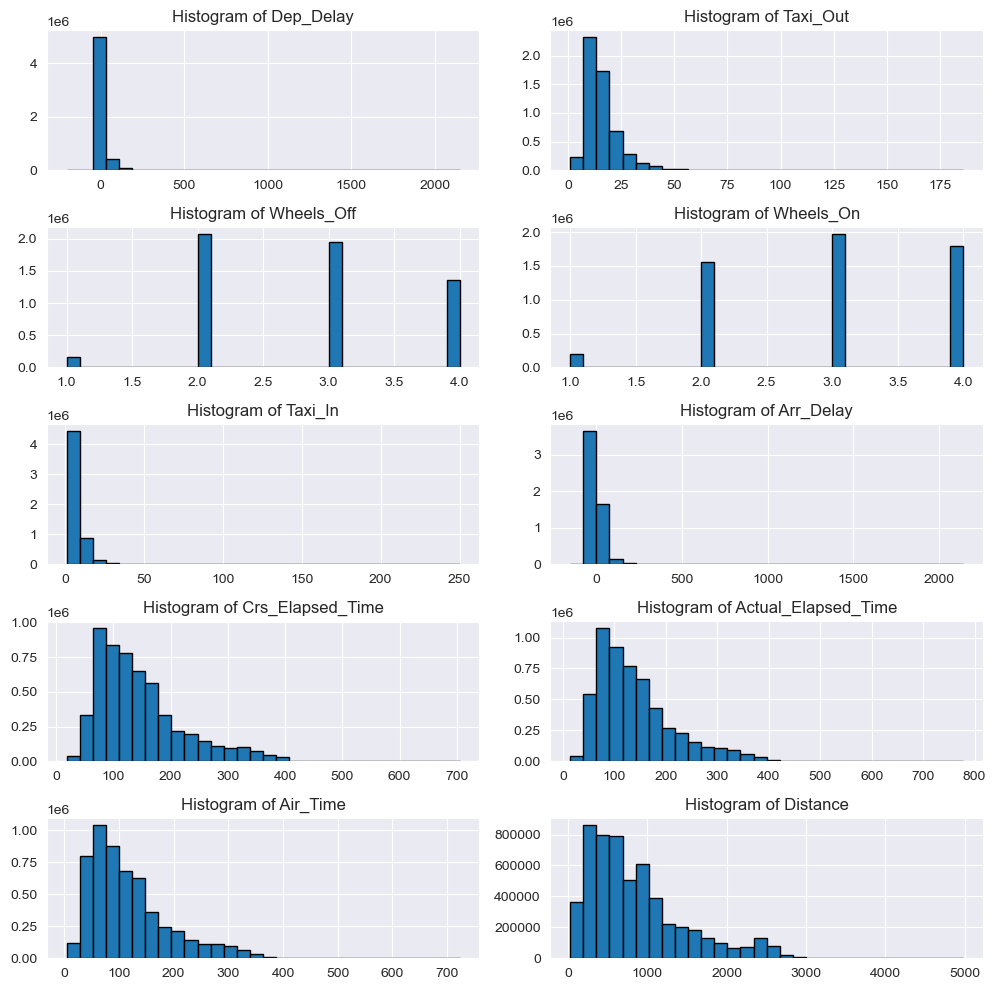

In [36]:

# Histogram of continuous columns
plt.figure(figsize=(10,10))

for i, column in enumerate(cont_cols):
    plt.subplot(5, 2, i + 1)  # Adjust the number of rows and columns as needed
    plt.hist(df[column].dropna(), bins=30, edgecolor='k')
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

* Most of the variables are right skewed

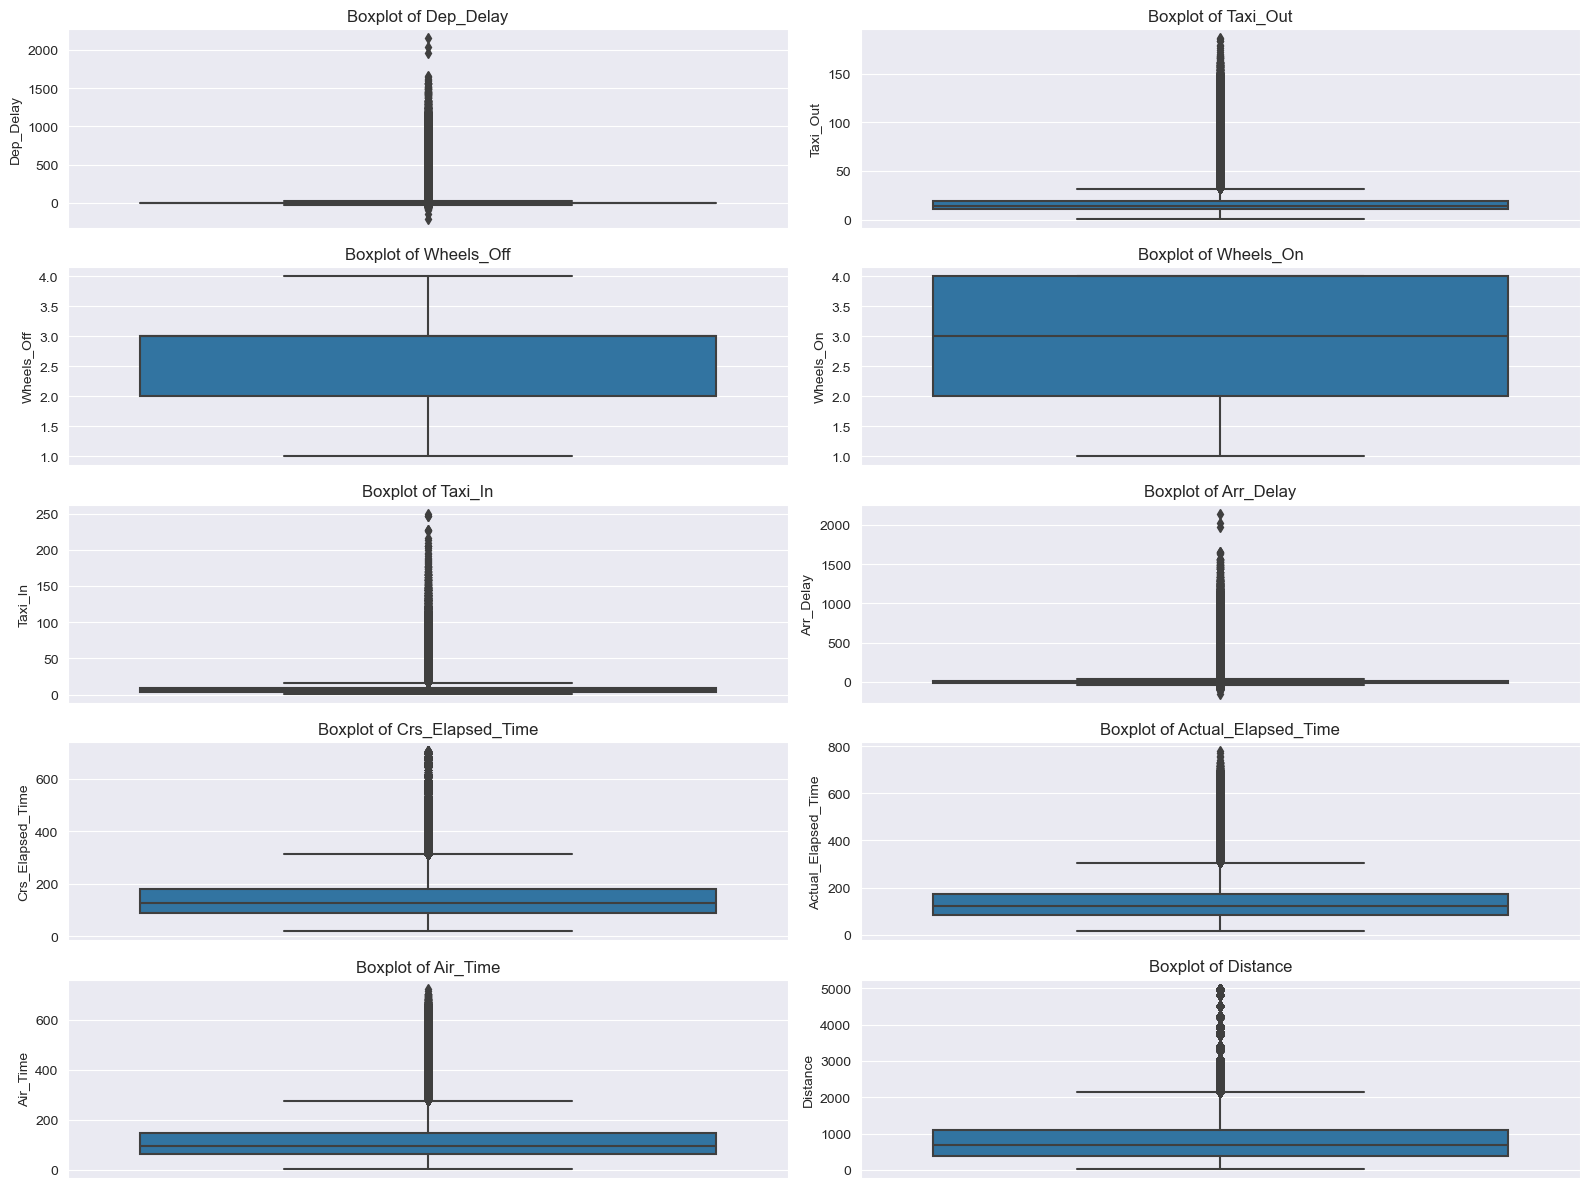

In [37]:
# Boxplot of continuous columns
plt.figure(figsize=(16, 12))

for i, column in enumerate(cont_cols):
    plt.subplot(5, 2, i + 1)  # Adjust the number of rows and columns as needed
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [40]:
df.head()

,Fl_Date,Op_Carrier,Origin,Dest,Crs_Dep_Time(h),Dep_Delay,Taxi_Out,Wheels_Off,Wheels_On,Taxi_In,Crs_Arr_Time(h),Arr_Delay,Cancelled,Diverted,Crs_Elapsed_Time,Actual_Elapsed_Time,Air_Time,Distance,Day,Month,Flight_Status,Weekday,Is_Weekend,Delayed
0,2016-01-01,Delta Airlines,Detroit,Los Angeles,20,0,23,4,4,13,22,-24,0,0,309,285,249,1979,1,1,0,4,0,0
1,2016-01-01,Delta Airlines,Atlanta,Grand Rapids,22,5,13,4,4,4,24,-2,0,0,116,109,92,640,1,1,0,4,0,0
2,2016-01-01,Delta Airlines,Los Angeles,Atlanta,23,1,19,4,1,5,6,-13,0,0,245,231,207,1947,1,1,0,4,0,0
3,2016-01-01,Delta Airlines,Salt Lake City,Atlanta,17,4,12,3,4,8,23,-16,0,0,213,193,173,1590,1,1,0,4,0,0
4,2016-01-01,Delta Airlines,Bozeman,Minneapolis,9,72,63,2,3,4,13,124,0,0,136,188,121,874,1,1,1,4,0,1


In [39]:
#Correlation Checking
df.corr()


,Dep_Delay,Taxi_Out,Wheels_Off,Wheels_On,Taxi_In,Arr_Delay,Crs_Elapsed_Time,Actual_Elapsed_Time,Air_Time,Distance
Dep_Delay,1.000000,0.065016,0.127875,0.039681,0.018582,0.951110,0.028103,0.031420,0.023102,0.024353
Taxi_Out,0.065016,1.000000,0.040081,0.030146,0.026192,0.220866,0.108052,0.197452,0.081268,0.066306
Wheels_Off,0.127875,0.040081,1.000000,0.651990,-0.018965,0.125856,-0.030112,-0.027719,-0.031863,-0.032386
Wheels_On,0.039681,0.030146,0.651990,1.000000,0.010613,0.043621,0.004562,0.007985,0.003783,-0.002267
Taxi_In,0.018582,0.026192,-0.018965,0.010613,1.000000,0.117401,0.138323,0.195100,0.120350,0.113139
Arr_Delay,0.951110,0.220866,0.125856,0.043621,0.117401,1.000000,-0.019426,0.036009,0.001502,-0.015661
Crs_Elapsed_Time,0.028103,0.108052,-0.030112,0.004562,0.138323,-0.019426,1.000000,0.985609,0.990585,0.984626
Actual_Elapsed_Time,0.031420,0.197452,-0.027719,0.007985,0.195100,0.036009,0.985609,1.000000,0.990288,0.974110
Air_Time,0.023102,0.081268,-0.031863,0.003783,0.120350,0.001502,0.990585,0.990288,1.000000,0.985704
Distance,0.024353,0.066306,-0.032386,-0.002267,0.113139,-0.015661,0.984626,0.974110,0.985704,1.000000


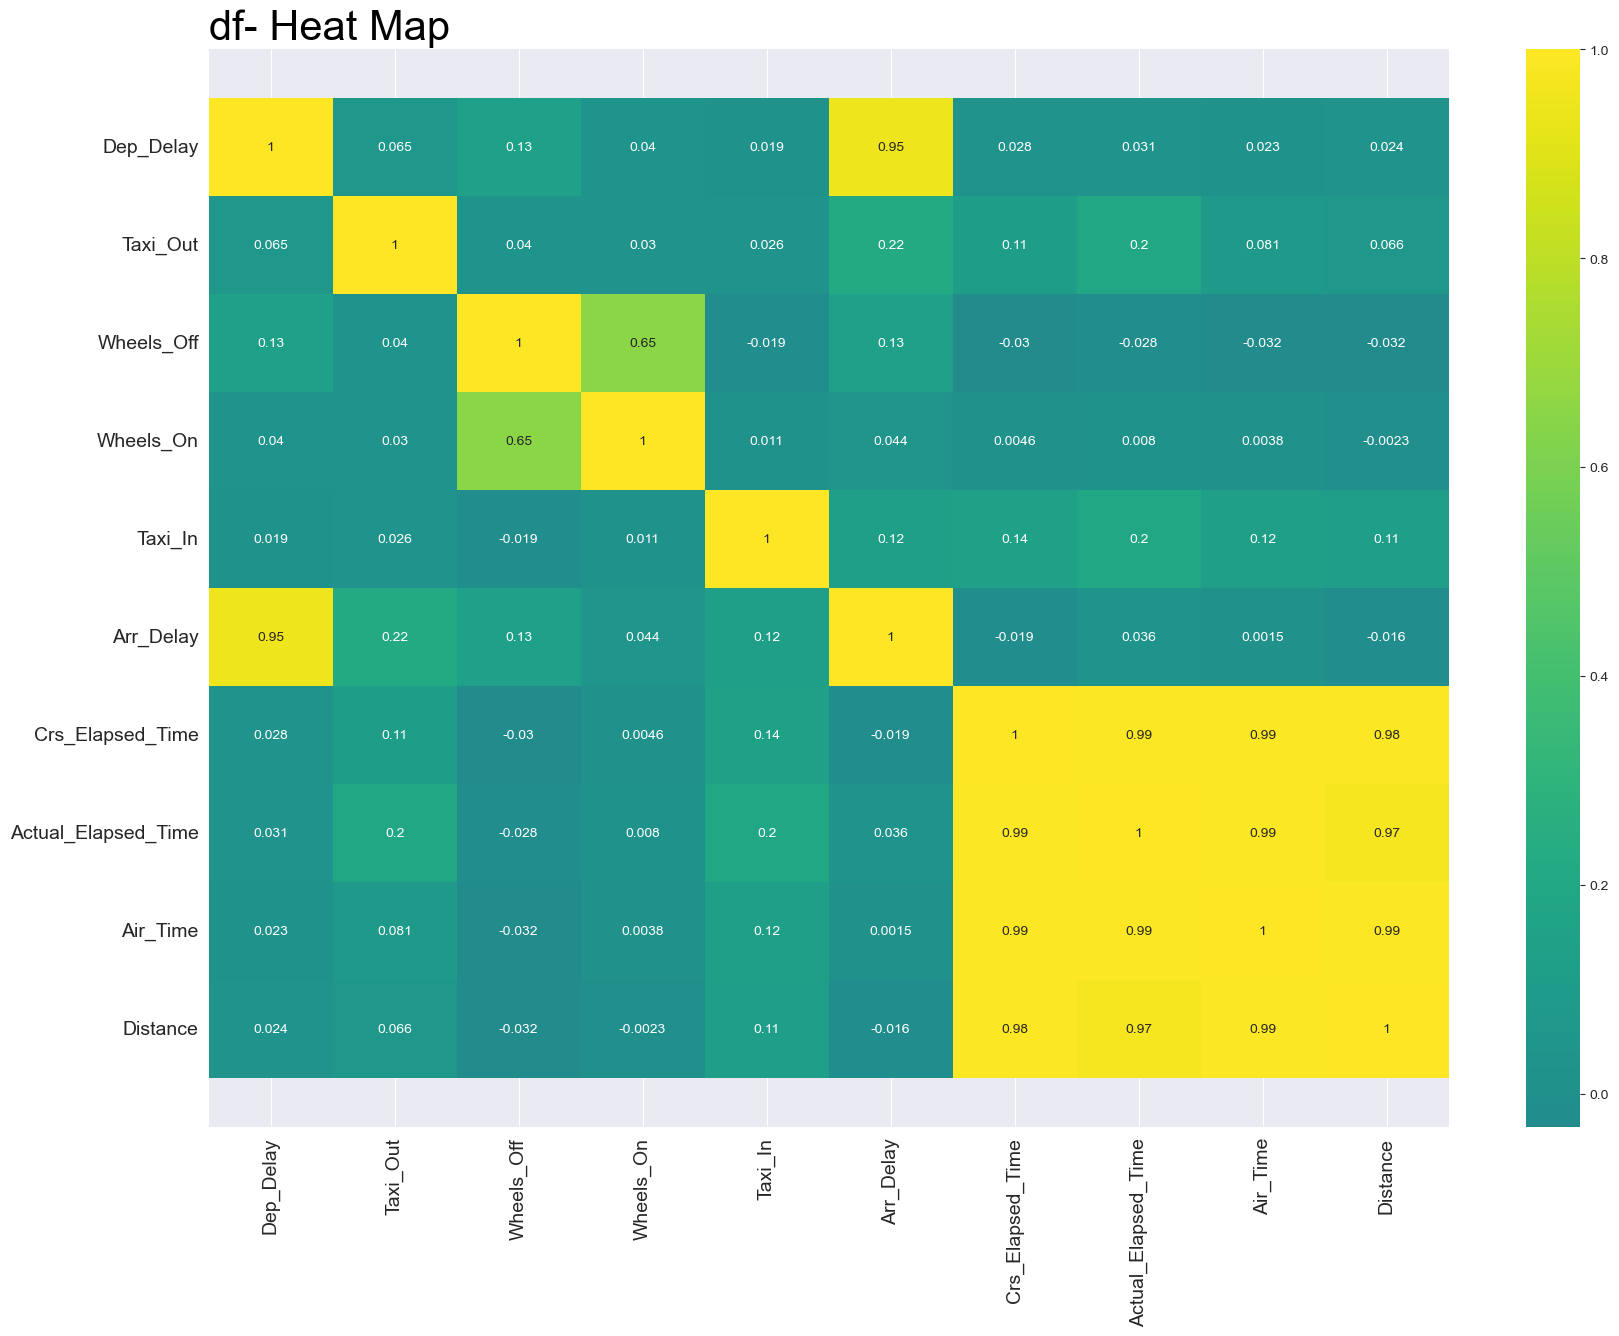

In [42]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(df.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "df- Heat Map", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

* We can see that there are some variables which correlated among themselves. Thus shows the Multicollinearity problem.
* We can remove some of the variables from the dataset to overcome Multicollinearity.
* Crs_Elapsed_Time, Actual_Elapsed_Time, Air_Time and Distance are correlated among themselves.
* So we can skip the variables Crs_Elapsed_Time, Actual_Elapsed_Time and Air_Time. Distance is a variable which is easily accessible.


In [43]:
# lets focus on Departure delay col
df['Dep_Delay'].describe()

count    5.537988e+06
mean     8.873748e+00
std      3.959868e+01
min     -2.040000e+02
25%     -5.000000e+00
50%     -2.000000e+00
75%      6.000000e+00
max      2.149000e+03
Name: Dep_Delay, dtype: float64

<Axes: ylabel='Dep_Delay'>

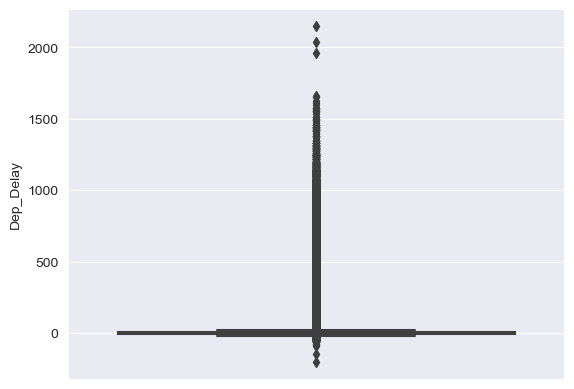

In [45]:
#min and Max value of Departure delay
sns.boxplot(data = df , y = 'Dep_Delay')

* There are some outliers present in the variables . We can remove the outliers to make the robust model.

In [48]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df




In [58]:
# Remove outliers from the dataframe
df1= remove_outliers(df, 'Dep_Delay')

In [59]:
#Change in shape
df.shape , df1.shape

((5537988, 24), (4807779, 24))

In [60]:
df1['Dep_Delay'].describe()

count    4.807779e+06
mean    -1.362677e+00
std      6.812529e+00
min     -2.100000e+01
25%     -5.000000e+00
50%     -3.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: Dep_Delay, dtype: float64

<Axes: ylabel='Dep_Delay'>

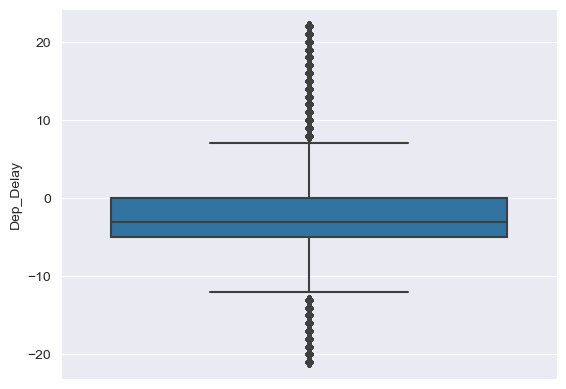

In [61]:
sns.boxplot(data = df1 , y = 'Dep_Delay')

In [62]:
cols_to_drop = ['Crs_Elapsed_Time', 'Actual_Elapsed_Time','Air_Time']

df1.drop(cols_to_drop, axis = 1, inplace=True)


In [63]:
df1.head()

,Fl_Date,Op_Carrier,Origin,Dest,Crs_Dep_Time(h),Dep_Delay,Taxi_Out,Wheels_Off,Wheels_On,Taxi_In,Crs_Arr_Time(h),Arr_Delay,Cancelled,Diverted,Distance,Day,Month,Flight_Status,Weekday,Is_Weekend,Delayed
0,2016-01-01,Delta Airlines,Detroit,Los Angeles,20,0,23,4,4,13,22,-24,0,0,1979,1,1,0,4,0,0
1,2016-01-01,Delta Airlines,Atlanta,Grand Rapids,22,5,13,4,4,4,24,-2,0,0,640,1,1,0,4,0,0
2,2016-01-01,Delta Airlines,Los Angeles,Atlanta,23,1,19,4,1,5,6,-13,0,0,1947,1,1,0,4,0,0
3,2016-01-01,Delta Airlines,Salt Lake City,Atlanta,17,4,12,3,4,8,23,-16,0,0,1590,1,1,0,4,0,0
7,2016-01-01,Delta Airlines,Atlanta,Jacksonville,10,1,19,2,2,3,11,3,0,0,270,1,1,1,4,0,1


<Axes: ylabel='Distance'>

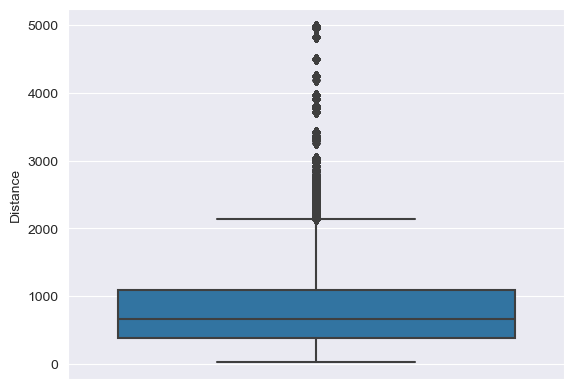

In [64]:
#lets focus on the distance variable
sns.boxplot(data = df1 , y = 'Distance')

In [65]:
# Remove outliers from the dataframe
df2= remove_outliers(df1, 'Distance') 

In [66]:
df2.shape, df1.shape

((4512002, 21), (4807779, 21))

In [69]:
pd.options.display.float_format = '{:.2f}'.format

In [70]:
df2.describe()

,Dep_Delay,Taxi_Out,Wheels_Off,Wheels_On,Taxi_In,Arr_Delay,Distance
count,4512002.00,4512002.00,4512002.00,4512002.00,4512002.00,4512002.00,4512002.00
mean,-1.42,15.80,2.75,2.94,7.33,-6.67,739.40
std,6.79,8.29,0.82,0.83,5.38,13.65,463.91
min,-21.00,1.00,1.00,1.00,1.00,-88.00,28.00
25%,-5.00,11.00,2.00,2.00,4.00,-15.00,370.00
50%,-3.00,14.00,3.00,3.00,6.00,-8.00,632.00
75%,0.00,18.00,3.00,4.00,8.00,0.00,1005.00
max,22.00,185.00,4.00,4.00,216.00,456.00,2136.00


In [71]:
#Exporting the data for Modelling
df2.to_csv('model_data.csv')